In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import pandas as pd
import numpy as np
import sys      # 최대정수를 가져오기 위해 import
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y 데이터 원핫인코딩  # from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt


# *로지스틱 회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [3]:
# 1. csv파일을 데이터프레임을 읽어오기(결측치처리,균형확인 용이) 기본encoding = utf-8
df = pd.read_csv('data/pima-indians-diabetes.csv',comment='#',header=None)
df.head()
# 1. 2시간내 포도당 농도
# 2. 혈압
# 3. 피부접힘 두께
# 4. 인슐린수치
# 5. BMI체질량지수
# 6. 가족력
# 7. 나이
# 8. 당뇨병발병여부

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()  # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()  # 열별 결측치 갯수 0

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [7]:
# 타겟변수의 균형
df[8].value_counts()/len(df)

0    0.651042
1    0.348958
Name: 8, dtype: float64

In [8]:
df.values
df.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
# 2. csv파일을 numpy배열로 읽어오기 : np.loadtxt() #이 있는 행은 제외하고 읽어오기
        # 기본 encoding=cp949
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',',encoding='utf-8')
dataset.shape

(768, 9)

In [15]:
# 데이터분할 : 학습데이터(모델학습용) + 시험데이터셋(모델평가용)
X_train = dataset[:620, :-1]
y_train = dataset[:620,-1]
X_test  = dataset[620:,:-1]
y_test  = dataset[620:,-1]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((620, 8), (620,), (148, 8), (148,))

## 2.  모델구성

In [34]:
model = Sequential()
# model.add(Dense(units=32, input_dim=8, # input_shape=(8,)
#                activation='relu'))
model.add(Input(shape=(8,)))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='elu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [35]:
# model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## 4. 학습

In [36]:
%%time
hist = model.fit(X_train,y_train,   # 훈련데이터셋(학습데이터셋)
                epochs=200,
                batch_size=310,
                # validation_data=(X_test,y_test),    =>  검증데이터셋을 넣는 것
                validation_split=0.1,   # 검증데이터 비율(훈련데이터에서 10% 검증데이터로)
                verbose=0)          # verbose=0 로그출력 X

CPU times: total: 5 s
Wall time: 4.87 s


## 5. 모델평가하기 
- 학습과정 시각화하여 살펴보기
- 평가
- 교차표(혼동매트릭스, 성능평가지표) 그리기

In [37]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

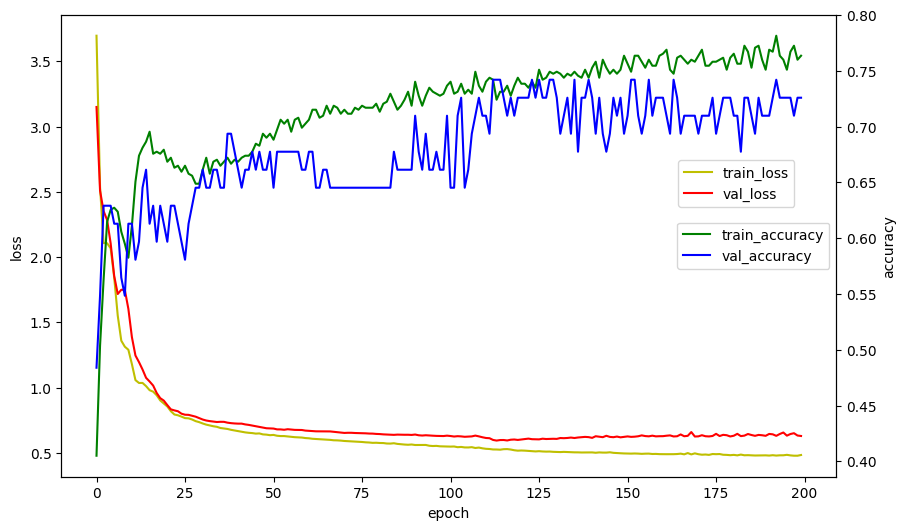

In [38]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [39]:
# 모델 평가 (X)
model.evaluate(X_train,y_train)

20/20 [==============================] - 0s 979us/step - loss: 0.4917 - accuracy: 0.7645


[0.4916885793209076, 0.7645161151885986]

In [42]:
# 모델 평가(O)
score = model.evaluate(X_test,y_test)
print("loss : {}, 정확도 : {:.2f}%".format(score[0],score[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6284
loss : 0.6435038447380066, 정확도 : 62.84%


In [48]:
# 교차표(혼동매트릭스, 성능평가지표) 그리기 : 테스트셋의 실제값과 예측값
y_hat = (model.predict(X_test) > 0.5).astype(int) 
y_test.shape,y_hat.shape # 실제값(1차원), 예측값(2차원)

5/5 [==============================] - 0s 1ms/step


((148,), (148, 1))

In [51]:
TN = 0; FP = 0;  FN = 0; TP = 0;
for y,h in zip(y_test,y_hat.reshape(-1)):
   # print(y,h)
    if y==0 and h==0:
        TN +=1  # TN 갯수 하나 증가
    elif y==0 and h==1:
        FP +=1
    elif y==1 and h==0:
        FN +=1
    else:
        TP +=1
print(TN,FP)
print(FN,TP)

70 26
29 23


In [57]:
ctab = pd.crosstab(y_test,y_hat.reshape(-1))  # y_hat은 2차원이라 rshape으로 1차원으로
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

pd.crosstab(y_test,             # 실제값
           y_hat.reshape(-1),    # 예측값
           rownames=['실제값'],  # index이름
           colnames=['예측값'])   # columns이름  

예측값,0,1
실제값,,
0.0,70,26
1.0,29,23


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat) # y_hat.reshape(-1) 둘 다 가능
# 결과가 numpy배열인  혼동행렬

array([[70, 26],
       [29, 23]], dtype=int64)

## 6. 모델사용(예측, 저장, 로드)

In [59]:
X_test[0]

array([  2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28.   ])

In [63]:
(model.predict([[2, 112,  86,  42, 160,  38.4  ,   0.246, 28],
               [1, 115,  86,  42, 160,  38.4  ,   0.246, 60]
               ])>0.5).astype(int)

1/1 [==============================] - 0s 27ms/step


array([[1],
       [0]])

In [65]:
# 모델저장
from tensorflow.keras.models import save_model,load_model
model.save('model/06binary.h5')
save_model(model,'model/06binary.h5')

In [66]:
model2 = load_model('model/06binary.h5')

In [67]:
(model.predict([[2, 112,  86,  42, 160,  38.4  ,   0.246, 28]
               ])>0.5).astype(int)

1/1 [==============================] - 0s 28ms/step


array([[1]])

# *분류분석
- 1. 데이터 생성 및 전처리 : 훈련셋(600),검증셋(100),데스트셋(68)으로 분리.타겟변수의 원핫인코딩
- 2. 모델생성(input 8, output 2) : 출력층의 활성화함수 :'softmax'
- 3. 모델 학습과정  loss='categorical_crossentropy', metrics=['accuracy']
- 4. 모델 학습  validation_data =[X_val,Y_val] : (검증데이터셋)
- 5. 모델 학습 평가
- 6. 모델 예측 - 예측 시 argmax()함수 활용
                0    1
                0.99 0.01
## 1. 데이터셋 생성 및 전처리

In [98]:
import pandas as pd
import numpy as np
import sys      # 최대정수를 가져오기 위해 import
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y 데이터 원핫인코딩  # from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt


In [99]:
# import 는 회귀분석 위와 동일
df = pd.read_csv('data/pima-indians-diabetes.csv',comment='#',header=None)
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [100]:
# 훈련셋(600),검증셋(100),데스트셋(68) : 총 768 dataset.shape
X_train = dataset[:600,:-1]
y_train = dataset[:600,-1]
X_val   = dataset[600:700,:-1]
y_val   = dataset[600:700,-1]
X_test  = dataset[700:,:-1]
y_test  = dataset[700:,-1]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [101]:
# 분류분석을 위한 타겟(종속)변수의 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val,2)
Y_test  = utils.to_categorical(y_test)
Y_train.shape,Y_val.shape,Y_test.shape

((600, 2), (100, 2), (68, 2))

In [102]:
print('원 데이터 :', y_train[0:3])
print('원핫인코딩데이터 :\n', Y_train[:3])

원 데이터 : [1. 0. 1.]
원핫인코딩데이터 :
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 2. 모델 생성(input 8, target 2)

In [103]:
model = Sequential()
model.add(Dense(units=32,input_shape=(8,),activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정하기

In [104]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy'])

## 4 모델 학습

In [105]:
hist = model.fit(X_train,Y_train,
                epochs=200,
                validation_data=(X_val,Y_val),
                verbose=1)

Epoch 1/200
19/19 [==============================] - 1s 8ms/step - loss: 4.0008 - accuracy: 0.5700 - val_loss: 1.3414 - val_accuracy: 0.5600
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 1.0303 - accuracy: 0.6083 - val_loss: 0.9965 - val_accuracy: 0.5200
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.6233 - val_loss: 0.9106 - val_accuracy: 0.4700
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.6283 - val_loss: 0.8858 - val_accuracy: 0.6700
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6383 - val_loss: 0.8903 - val_accuracy: 0.6700
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.6633 - val_loss: 0.8012 - val_accuracy: 0.5500
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.6733 - val_loss: 1.1734 - val_accuracy: 0.4400
Epoch 8/200
1

Epoch 59/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7333 - val_loss: 0.6542 - val_accuracy: 0.6300
Epoch 60/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7133 - val_loss: 0.6263 - val_accuracy: 0.6300
Epoch 61/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7350 - val_loss: 0.6785 - val_accuracy: 0.6300
Epoch 62/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7383 - val_loss: 0.6434 - val_accuracy: 0.6300
Epoch 63/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7400 - val_loss: 0.6680 - val_accuracy: 0.6300
Epoch 64/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7150 - val_loss: 0.5864 - val_accuracy: 0.6700
Epoch 65/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7283 - val_loss: 0.6337 - val_accuracy: 0.6700
Epoch 

19/19 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7717 - val_loss: 0.6131 - val_accuracy: 0.7100
Epoch 117/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7400 - val_loss: 0.5999 - val_accuracy: 0.7300
Epoch 118/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7533 - val_loss: 0.5736 - val_accuracy: 0.6700
Epoch 119/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7733 - val_loss: 0.5497 - val_accuracy: 0.7500
Epoch 120/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7717 - val_loss: 0.6774 - val_accuracy: 0.7400
Epoch 121/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7383 - val_loss: 0.5759 - val_accuracy: 0.7400
Epoch 122/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7650 - val_loss: 0.7153 - val_accuracy: 0.5800
Epoch 123/200

19/19 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7600 - val_loss: 0.6247 - val_accuracy: 0.7100
Epoch 174/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7833 - val_loss: 0.5957 - val_accuracy: 0.7100
Epoch 175/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7717 - val_loss: 0.7282 - val_accuracy: 0.6700
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7750 - val_loss: 0.5919 - val_accuracy: 0.7100
Epoch 177/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7733 - val_loss: 0.6600 - val_accuracy: 0.7100
Epoch 178/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7800 - val_loss: 0.5643 - val_accuracy: 0.7300
Epoch 179/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7633 - val_loss: 0.5448 - val_accuracy: 0.7200
Epoch 180/200

## 5. 모델평가

In [106]:
ㅍ

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

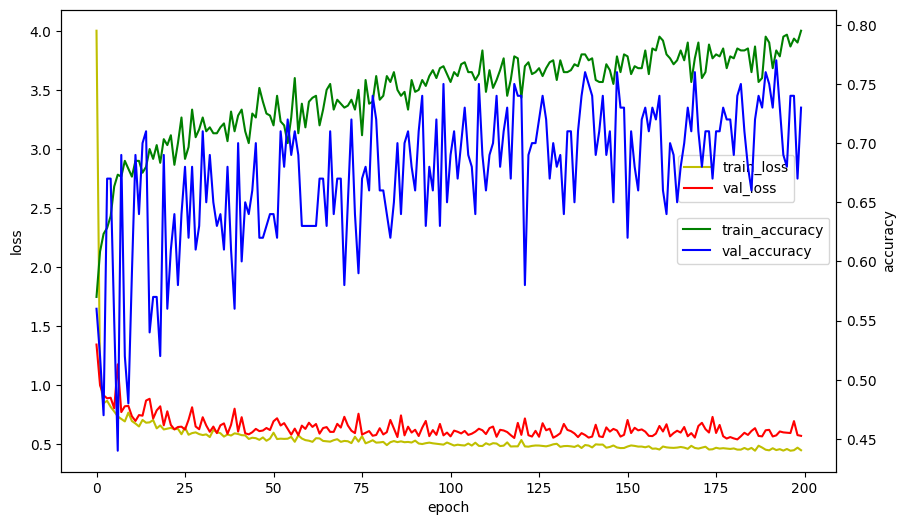

In [107]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [108]:
# 모델 평가
model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7059


[0.6330327987670898, 0.7058823704719543]

In [111]:
# 혼동행렬, 교차표 ( 원핫인코딩을 다시 복구 )
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 3ms/step


In [113]:
pd.crosstab(y_test,y_hat,rownames=['실제값'],colnames=['예측값'])

예측값,0,1
실제값,,
0.0,33,8
1.0,12,15


In [114]:
confusion_matrix(y_test,y_hat)

array([[33,  8],
       [12, 15]], dtype=int64)

## 6. 모델사용하기

In [116]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [120]:
pred = model.predict(X_test[0].reshape(-1,8))
pred.argmax(axis=1)

1/1 [==============================] - 0s 14ms/step


array([0], dtype=int64)